In [10]:
import os
import re
import matplotlib.pyplot as plt

In [11]:
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        content = file.read()
        
    # Usa una regular expression per estrarre i dati
    pattern = r"data_instance.id: (\d+)\s+data_instance.label: (\d+)\s+Prediction: (\d+)\s+node embeddings: tensor\(\[\[([0-9.]+), ([0-9.]+)\]\], dtype=torch.float64\)"
    matches = re.findall(pattern, content)
    
    for match in matches:
        instance_id = int(match[0])
        label = int(match[1])
        prediction = int(match[2])
        x = float(match[3])
        y = float(match[4])
        data.append((instance_id, label, x, y, prediction))
    
    return data

# Funzione per plottare i dati
def plot_data(data):
    # Separiamo i dati in due gruppi per le previsioni 0 e 1
    x_0 = [d[1] for d in data if d[3] == 0]
    y_0 = [d[2] for d in data if d[3] == 0]
    x_1 = [d[1] for d in data if d[3] == 1]
    y_1 = [d[2] for d in data if d[3] == 1]
    # ids_0 = [d[0] for d in data if d[3] == 0]
    # ids_1 = [d[0] for d in data if d[3] == 1]
    
    # Annotiamo prima i punti (in modo che il testo venga visualizzato dietro i punti)
    # for i, txt in enumerate(ids_0):
    #     plt.annotate(txt, (x_0[i], y_0[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')
    # for i, txt in enumerate(ids_1):
    #     plt.annotate(txt, (x_1[i], y_1[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

    # Ora tracciamo i punti (i punti saranno in primo piano)
    plt.scatter(x_0, y_0, color='blue', label='Class 0', alpha=0.1)
    plt.scatter(x_1, y_1, color='red', label='Class 1', alpha=0.1)
    
    plt.xlabel(r'$x_0$')
    plt.ylabel(r'$x_1$')
    plt.legend()
    plt.grid(True)

In [61]:
# Funzione per plottare i dati
def plot_data2(data):
    # Separiamo i dati in due gruppi per le previsioni 0 e 1
    x_0_correct = [d[2] for d in data if d[1] == d[4] and d[4] == 0]  # x quando label = previsione = 0
    y_0_correct = [d[3] for d in data if d[1] == d[4] and d[4] == 0]  # y quando label = previsione = 0
    x_1_correct = [d[2] for d in data if d[1] == d[4] and d[4] == 1]  # x quando label = previsione = 1
    y_1_correct = [d[3] for d in data if d[1] == d[4] and d[4] == 1]  # y quando label = previsione = 1
    
    x_0_incorrect = [d[2] for d in data if d[1] != d[4] and d[4] == 0]  # x quando label != previsione = 0
    y_0_incorrect = [d[3] for d in data if d[1] != d[4] and d[4] == 0]  # y quando label != previsione = 0
    x_1_incorrect = [d[2] for d in data if d[1] != d[4] and d[4] == 1]  # x quando label != previsione = 1
    y_1_incorrect = [d[3] for d in data if d[1] != d[4] and d[4] == 1]  # y quando label != previsione = 1

    # Conteggi per ogni categoria
    correct_0_count = len(x_0_correct)
    correct_1_count = len(x_1_correct)
    incorrect_0_count = len(x_0_incorrect)
    incorrect_1_count = len(x_1_incorrect)
    
    plt.scatter(x_0_correct, y_0_correct, color='blue', label=f'Class 0 (Correct) - {correct_0_count}', alpha=0.15, marker='o', s=30)
    plt.scatter(x_0_incorrect, y_0_incorrect, color='midnightblue', label=f'Class 0 (Incorrect) - {incorrect_0_count}', alpha=0.75, marker='x', s=8)
    
    plt.scatter(x_1_correct, y_1_correct, color='red', label=f'Class 1 (Correct) - {correct_1_count}', alpha=0.15, marker='o', s=30)
    plt.scatter(x_1_incorrect, y_1_incorrect, color='darkred', label=f'Class 1 (Incorrect) - {incorrect_1_count}', alpha=0.75, marker='x', s=8)

    # Etichette e legende
    plt.xlabel(r'$x_0$')
    plt.ylabel(r'$x_1$')
    plt.title(r'Node embeddings $(x_0,x_1)$')
    plt.legend()
    plt.grid(True)
    plt.show()


In [62]:
# Ricava il nome del file più recente
file_name = max(os.listdir("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\"), key=lambda f: os.path.getmtime(os.path.join("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\", f)))
file_name = file_name.split('.')[0]

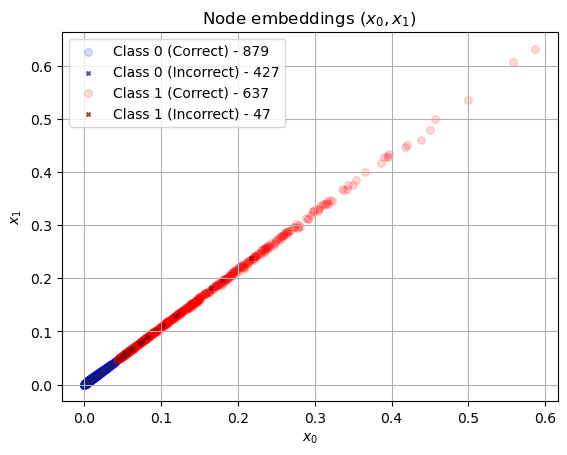

In [63]:
data = read_data("..\\..\\explainability\GRETEL-repo\\output\\embeddings\\" + file_name + ".txt")

plot_data2(data)